# <FONT COLOR='red'>**_OVERALL DESCRIPTION_**</FONT>

---
---

The objective of this notebook is to perform the process of labeling the flows found in the dataset called UNI1. For this purpose, the **K-Means** algorithm is implemented and the new dataset named as UNIV1 is created.


## <FONT COLOR = 'gray'>**IMPORT MODEL LIBRARIES**</FONT>

---

Next, we need import some libraries to use the model.

1. `from sklearn.cluster import KMeans`: This scikit-learn class is used to implement the **K-Means** clustering algorithm, which is an unsupervised clustering technique designed to group data into a given number of **Clusters** according to the similarities of the records.
2. `from sklearn.metrics import silhouette_score, davies_bouldin_score`:The `silhouette_score` import allows to calculate the silhouette coefficient, a measure that allows to evaluate how similar a point is to its own **cluster** compared to other **clusters**. Values range from -1 to 1, where values close to 1 indicate well-defined clusters; this is how we will consider the value in percentage form. On the other hand, the import of `davies_bouldin_score` allows to calculate the Davies-Bouldin index, another metric to evaluate the quality of the clustering. A lower value (Close to 0) of the Davies-Bouldin index indicates a better separation between clusters.

## <FONT COLOR = 'gray'>**IMPORT GRAPHIC LIBRARIES**</FONT>

---

Next, we need import some libraries to create graphics.
1. `import matplotlib.pyplot as plt`: Python plotting library, `pyplot` is a module of `matplotlib` that provides a MATLAB-like interface for creating plots. It allows you to create a wide variety of graphs such as line, bar, scatter, histograms, among others. Generally renamed to `plt` for ease of use in code.
2. `import seaborn as sns`: It allows the visualization of statistical data in a more attractive way; the library is characterized by allowing an easy creation of the same. It is usually renamed with `sns` to improve its usability in the code.

## <FONT COLOR = 'gray'>**IMPORT DATA ANALYSIS LIBRARIES**</FONT>

---

Next, we need import some libraries to data analysis graphics.
5. `import pandas as pd`: An essential component for data analysis and manipulation in Python, it provides data structures such as Series (one-dimensional) and DataFrames (two-dimensional) that allow you to handle tabular data with ease.
6. `import numpy as np`:Fundamental component for numerical computation in Python, as it provides support for multidimensional arrays and matrices, as well as a large collection of mathematical functions to operate on these arrays.

In [1]:
# IMPORT MODEL LIBRARIES
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# IMPORT GRAPHIC LIBRARIES
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORT DATA ANALYSIS LIBRARIES
import pandas as pd
import numpy as np

In [2]:
# UNI1 DATASET ID
id = '1NjS2BSDHCsECTbGS7xy4KiJxQ3nz73DQ'

# GENERATE THE DOWNLOAD URL
url_uni1 = f'https://drive.google.com/uc?id={id}'

# DOWNLOAD AND LOAD UNI1 DATASET IN A DATAFRAME OF PANDAS
uni1_df = pd.read_csv(url_uni1)

We will use the UNI1 dataset which contains traffic traces from several DCNs collected by a university in 2010. The traffic traces in the dataset are only IPv4.

UNI1 contain the follow structure:

1. `start_time`: Represent the beginning of the capture per flow.
2. `end_time`: Represent the finish of the capture per flow.
3. `ip_src`: Represent the source IPv4.
4. `ip_dst`: Represent the destination IPv4.
5. `ip_proto`: Represent the IP protocol used.
6. `port_src`: Represent the source port.
7. `port_dst`: Represent the destination port.
8. `size_pkt1`: Represent the size of the packet 1.
9. `size_pkt2`: Represent the size of the packet 2.
10. `size_pkt3`: Represent the size of the packet 3.
11. `size_pkt4`: Represent the size of the packet 4.
12. `size_pkt5`: Represent the size of the packet 5.
13. `size_pkt6`: Represent the size of the packet 6.
14. `size_pkt7`: Represent the size of the packet 7.
15. `iat_pkt2`: Represent the inter arrive time of the packet 2.
16. `iat_pkt3`: Represent the inter arrive time of the packet 3.
17. `iat_pkt4`: Represent the inter arrive time of the packet 4.
18. `iat_pkt5`: Represent the inter arrive time of the packet 5.
19. `iat_pkt6`: Represent the inter arrive time of the packet 6.
20. `iat_pkt7`: Represent the inter arrive time of the packet 7.
21. `tot_size`: Represent the total size per flow.

In [3]:
# PRESENTATION OF AN EXAMPLE OF THE DATA
pd.set_option('display.max_columns', None)
display(uni1_df.sample(10))

,start_time,end_time,ip_src,ip_dst,ip_proto,port_src,port_dst,size_pkt1,size_pkt2,size_pkt3,size_pkt4,size_pkt5,size_pkt6,size_pkt7,iat_pkt2,iat_pkt3,iat_pkt4,iat_pkt5,iat_pkt6,iat_pkt7,tot_size
72174,1261068709448740,1261068710559743,41.177.26.91,15.71.149.82,6,80,42393,82,70.0,1518.0,1518.0,1518.0,1518.0,1518.0,95404.0,748735.0,97.0,21.0,84606.0,22.0,17553.0
55697,1261069671943836,1261069672428557,41.177.26.176,77.197.128.164,6,80,28081,66,64.0,1518.0,1028.0,1518.0,64.0,1518.0,77725.0,329095.0,5.0,106.0,5.0,77554.0,11878.0
10474,1261069147578304,1261069150232068,244.3.210.197,18.219.111.254,6,80,11869,66,271.0,271.0,271.0,271.0,1510.0,1510.0,167229.0,121513.0,128206.0,802602.0,694392.0,5.0,16244.0
23946,1261067166471632,1261071077903865,41.177.31.192,210.218.218.164,17,1985,1985,66,66.0,66.0,66.0,66.0,66.0,66.0,51.0,2851935.0,52.0,2587965.0,53.0,2584002.0,190476.0
12637,1261069577214996,1261069583357750,41.177.26.176,68.157.168.106,6,80,62376,82,70.0,1518.0,238.0,830.0,256.0,256.0,43019.0,1535609.0,5.0,9839.0,175.0,78.0,24604.0
38762,1261070196838554,1261070197645218,244.3.160.239,168.91.90.164,6,80,13291,64,64.0,321.0,1258.0,1258.0,1258.0,546.0,20396.0,215618.0,50954.0,102.0,20817.0,21.0,104765.0
5392,1261068129240513,1261068132505836,41.177.143.106,41.177.3.224,6,2655,9810,1438,1438.0,1438.0,1438.0,1438.0,1438.0,1438.0,106.0,117.0,117.0,117.0,123.0,110.0,37884.0
39735,1261068807583159,1261068807893690,41.177.230.253,244.3.31.40,6,43164,22,66,64.0,64.0,80.0,538.0,64.0,82.0,421.0,7500.0,228.0,532.0,1045.0,172.0,10472.0
38941,1261068533037895,1261068533631117,41.177.26.176,77.197.128.254,6,80,10877,66,64.0,1518.0,1028.0,1518.0,74.0,1518.0,82060.0,347414.0,4.0,123.0,5.0,81725.0,12214.0
16539,1261070308406604,1261070311519109,244.3.210.197,241.82.197.204,6,80,26557,82,70.0,1438.0,1438.0,1438.0,1438.0,1438.0,256881.0,117135.0,4.0,32334.0,4.0,4.0,66986.0


In [4]:
uni1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73393 entries, 0 to 73392
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   start_time  73393 non-null  int64  
 1   end_time    73393 non-null  int64  
 2   ip_src      73393 non-null  object 
 3   ip_dst      73393 non-null  object 
 4   ip_proto    73393 non-null  int64  
 5   port_src    73393 non-null  int64  
 6   port_dst    73393 non-null  int64  
 7   size_pkt1   73393 non-null  int64  
 8   size_pkt2   73393 non-null  float64
 9   size_pkt3   73393 non-null  float64
 10  size_pkt4   73393 non-null  float64
 11  size_pkt5   73393 non-null  float64
 12  size_pkt6   73393 non-null  float64
 13  size_pkt7   73393 non-null  float64
 14  iat_pkt2    73393 non-null  float64
 15  iat_pkt3    73393 non-null  float64
 16  iat_pkt4    73393 non-null  float64
 17  iat_pkt5    73393 non-null  float64
 18  iat_pkt6    73393 non-null  float64
 19  iat_pkt7    73393 non-nul

In [5]:
uni1_df.describe()

,start_time,end_time,ip_proto,port_src,port_dst,size_pkt1,size_pkt2,size_pkt3,size_pkt4,size_pkt5,size_pkt6,size_pkt7,iat_pkt2,iat_pkt3,iat_pkt4,iat_pkt5,iat_pkt6,iat_pkt7,tot_size
count,7.339300e+04,7.339300e+04,73393.000000,73393.000000,73393.000000,73393.000000,73393.000000,73393.000000,73393.000000,73393.000000,73393.000000,73393.000000,7.339300e+04,7.339300e+04,7.339300e+04,7.339300e+04,7.339300e+04,7.339300e+04,7.339300e+04
mean,1.261069e+15,1.261069e+15,6.347962,3145.720900,29635.829848,125.486749,215.320344,1085.966836,969.905481,1115.356247,893.260147,1076.360934,1.095717e+05,3.809718e+05,5.989754e+04,4.968590e+04,5.362829e+04,5.779133e+04,1.657824e+05
std,1.122743e+09,1.122437e+09,3.449655,11137.874909,21625.442305,235.526982,401.535756,561.901378,543.152357,527.033782,618.662666,548.221857,3.133269e+05,6.003828e+05,3.288824e+05,3.212260e+05,2.620339e+05,2.943502e+05,1.543428e+07
min,1.261067e+15,1.261067e+15,1.000000,-1.000000,-1.000000,64.000000,64.000000,64.000000,62.000000,64.000000,64.000000,64.000000,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,1.000000e+04
25%,1.261068e+15,1.261068e+15,6.000000,80.000000,6837.000000,66.000000,64.000000,484.000000,496.000000,715.000000,225.000000,648.000000,1.310100e+04,4.077000e+03,5.000000e+00,2.400000e+01,8.000000e+00,2.100000e+01,1.192400e+04
50%,1.261069e+15,1.261069e+15,6.000000,80.000000,32787.000000,66.000000,64.000000,1438.000000,1028.000000,1438.000000,1097.000000,1438.000000,7.899100e+04,2.824090e+05,7.100000e+01,1.230000e+02,1.870000e+02,1.250000e+02,1.378100e+04
75%,1.261070e+15,1.261070e+15,6.000000,80.000000,49659.000000,70.000000,70.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,8.210100e+04,3.748600e+05,1.647000e+03,2.513000e+03,5.946600e+04,7.568400e+04,3.688600e+04
max,1.261071e+15,1.261071e+15,224.000000,65467.000000,65532.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,4.999840e+06,4.999880e+06,4.999870e+06,4.999913e+06,4.999889e+06,4.999983e+06,4.138357e+09


## <FONT COLOR = 'orange'>**DATA CLEANING**</FONT>

---

For the creation of any type of ML (Machine Learning) model, it is necessary to perform a data cleaning in order to eliminate outliers, additionally, for the implementation of the `K-Means` algorithm all the records of the dataset are transformed to numerical data.

In [6]:
uni1_df_copy = uni1_df.copy()

def ip_to_int(ip):
    parts = ip.split('.')
    return int(''.join(parts))

uni1_df_copy['ip_src'] = uni1_df_copy['ip_src'].apply(ip_to_int).astype('int64')
uni1_df_copy['ip_dst'] = uni1_df_copy['ip_dst'].apply(ip_to_int).astype('int64')

uni1_df_copy = uni1_df_copy.astype('int64')

In [7]:
uni1_df_copy.head()

,start_time,end_time,ip_src,ip_dst,ip_proto,port_src,port_dst,size_pkt1,size_pkt2,size_pkt3,size_pkt4,size_pkt5,size_pkt6,size_pkt7,iat_pkt2,iat_pkt3,iat_pkt4,iat_pkt5,iat_pkt6,iat_pkt7,tot_size
0,1261067166249838,1261067166272053,411772655,2443160248,6,80,43521,66,64,275,1518,1518,1518,1518,616,6289,14258,22,20,58,10992
1,1261067165656630,1261067171636653,411772615,164247105218,6,80,1506,1518,1518,1518,1518,1518,950,1518,1121030,21,998925,21,31021,50,27138
2,1261067170895775,1261067171122094,4117798176,41177194186,6,80,1587,66,64,1518,1518,1518,1012,1518,8299,207090,121,125,1971,410,22521
3,1261067173048827,1261067173202738,411772655,2443160248,6,80,43584,66,64,1518,1518,1518,1518,1518,727,151600,21,19,744,20,14904
4,1261067172050638,1261067172468947,411772615,68157168224,6,80,62277,82,70,1518,1518,1518,1518,1518,43584,243392,21,34,43685,33,56918


In [8]:
uni1_df_copy.describe()

,start_time,end_time,ip_src,ip_dst,ip_proto,port_src,port_dst,size_pkt1,size_pkt2,size_pkt3,size_pkt4,size_pkt5,size_pkt6,size_pkt7,iat_pkt2,iat_pkt3,iat_pkt4,iat_pkt5,iat_pkt6,iat_pkt7,tot_size
count,7.339300e+04,7.339300e+04,7.339300e+04,7.339300e+04,73393.000000,73393.000000,73393.000000,73393.000000,73393.000000,73393.000000,73393.000000,73393.000000,73393.000000,73393.000000,7.339300e+04,7.339300e+04,7.339300e+04,7.339300e+04,7.339300e+04,7.339300e+04,7.339300e+04
mean,1.261069e+15,1.261069e+15,7.680050e+09,3.495944e+10,6.347962,3145.720900,29635.829848,125.486749,215.320344,1085.966836,969.905481,1115.356247,893.260147,1076.360934,1.095717e+05,3.809718e+05,5.989754e+04,4.968590e+04,5.362829e+04,5.779133e+04,1.657824e+05
std,1.122743e+09,1.122437e+09,2.431777e+10,4.129127e+10,3.449655,11137.874909,21625.442305,235.526982,401.535756,561.901378,543.152357,527.033782,618.662666,548.221857,3.133269e+05,6.003828e+05,3.288824e+05,3.212260e+05,2.620339e+05,2.943502e+05,1.543428e+07
min,1.261067e+15,1.261067e+15,1.173467e+06,9.047700e+05,1.000000,-1.000000,-1.000000,64.000000,64.000000,64.000000,62.000000,64.000000,64.000000,64.000000,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,1.000000e+04
25%,1.261068e+15,1.261068e+15,2.443160e+09,2.443160e+09,6.000000,80.000000,6837.000000,66.000000,64.000000,484.000000,496.000000,715.000000,225.000000,648.000000,1.310100e+04,4.077000e+03,5.000000e+00,2.400000e+01,8.000000e+00,2.100000e+01,1.192400e+04
50%,1.261069e+15,1.261069e+15,4.117726e+09,7.719722e+09,6.000000,80.000000,32787.000000,66.000000,64.000000,1438.000000,1028.000000,1438.000000,1097.000000,1438.000000,7.899100e+04,2.824090e+05,7.100000e+01,1.230000e+02,1.870000e+02,1.250000e+02,1.378100e+04
75%,1.261070e+15,1.261070e+15,4.117726e+09,7.719713e+10,6.000000,80.000000,49659.000000,70.000000,70.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,8.210100e+04,3.748600e+05,1.647000e+03,2.513000e+03,5.946600e+04,7.568400e+04,3.688600e+04
max,1.261071e+15,1.261071e+15,2.542042e+11,2.542241e+11,224.000000,65467.000000,65532.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,4.999840e+06,4.999880e+06,4.999870e+06,4.999913e+06,4.999889e+06,4.999983e+06,4.138357e+09


In [9]:
count_src = (uni1_df_copy['port_src'] < 0).sum()
count_dst = (uni1_df_copy['port_dst'] < 0).sum()
print(f'SRC: {count_src}, DST:{count_dst}')

SRC: 137, DST:137


In [10]:
uni1_df_copy = uni1_df_copy[uni1_df_copy['port_src']>=1]
uni1_df_copy = uni1_df_copy[uni1_df_copy['port_dst']>=1]
uni1_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73256 entries, 0 to 73392
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   start_time  73256 non-null  int64
 1   end_time    73256 non-null  int64
 2   ip_src      73256 non-null  int64
 3   ip_dst      73256 non-null  int64
 4   ip_proto    73256 non-null  int64
 5   port_src    73256 non-null  int64
 6   port_dst    73256 non-null  int64
 7   size_pkt1   73256 non-null  int64
 8   size_pkt2   73256 non-null  int64
 9   size_pkt3   73256 non-null  int64
 10  size_pkt4   73256 non-null  int64
 11  size_pkt5   73256 non-null  int64
 12  size_pkt6   73256 non-null  int64
 13  size_pkt7   73256 non-null  int64
 14  iat_pkt2    73256 non-null  int64
 15  iat_pkt3    73256 non-null  int64
 16  iat_pkt4    73256 non-null  int64
 17  iat_pkt5    73256 non-null  int64
 18  iat_pkt6    73256 non-null  int64
 19  iat_pkt7    73256 non-null  int64
 20  tot_size    73256 non-null  int64

In [11]:
uni1_df_copy.describe()

,start_time,end_time,ip_src,ip_dst,ip_proto,port_src,port_dst,size_pkt1,size_pkt2,size_pkt3,size_pkt4,size_pkt5,size_pkt6,size_pkt7,iat_pkt2,iat_pkt3,iat_pkt4,iat_pkt5,iat_pkt6,iat_pkt7,tot_size
count,7.325600e+04,7.325600e+04,7.325600e+04,7.325600e+04,73256.000000,73256.000000,73256.000000,73256.000000,73256.000000,73256.000000,73256.000000,73256.000000,73256.000000,73256.000000,7.325600e+04,7.325600e+04,7.325600e+04,7.325600e+04,7.325600e+04,7.325600e+04,7.325600e+04
mean,1.261069e+15,1.261069e+15,7.596435e+09,3.490560e+10,6.254368,3151.605752,29691.255283,125.522182,215.548351,1087.716119,971.369512,1117.003508,894.488288,1077.909113,1.076502e+05,3.794521e+05,5.833371e+04,4.788029e+04,5.201809e+04,5.586767e+04,1.607302e+05
std,1.121833e+09,1.121561e+09,2.391716e+10,4.111670e+10,1.653295,11147.452830,21607.605928,235.640486,401.868132,560.863173,542.413292,525.860771,618.346588,547.285177,3.025231e+05,5.962716e+05,3.208674e+05,3.125970e+05,2.517316e+05,2.839511e+05,1.541233e+07
min,1.261067e+15,1.261067e+15,1.173467e+06,9.047700e+05,6.000000,22.000000,20.000000,64.000000,64.000000,64.000000,62.000000,64.000000,64.000000,64.000000,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,1.000000e+04
25%,1.261068e+15,1.261068e+15,2.443160e+09,2.443160e+09,6.000000,80.000000,7000.000000,66.000000,64.000000,502.000000,508.000000,723.000000,225.000000,650.000000,1.310275e+04,4.055750e+03,5.000000e+00,2.400000e+01,8.000000e+00,2.100000e+01,1.192400e+04
50%,1.261069e+15,1.261069e+15,4.117726e+09,7.719722e+09,6.000000,80.000000,32848.500000,66.000000,64.000000,1438.000000,1028.000000,1438.000000,1097.000000,1438.000000,7.899000e+04,2.822425e+05,7.100000e+01,1.230000e+02,1.860000e+02,1.250000e+02,1.375600e+04
75%,1.261070e+15,1.261070e+15,4.117726e+09,7.719713e+10,6.000000,80.000000,49684.000000,70.000000,70.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,8.209300e+04,3.746052e+05,1.602000e+03,2.429000e+03,5.892425e+04,7.465775e+04,3.683275e+04
max,1.261071e+15,1.261071e+15,2.542042e+11,2.542241e+11,17.000000,65467.000000,65532.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,4.988430e+06,4.999808e+06,4.991721e+06,4.999882e+06,4.989872e+06,4.999983e+06,4.138357e+09


In [12]:
df_v1 = uni1_df_copy.copy()

duration = pd.Series(df_v1['end_time']-df_v1['start_time'])
df_v1.insert(loc=0, column='duration', value=duration)
df_v1.drop(columns=['start_time', 'end_time'], inplace=True)

In [13]:
df_v1.head()

,duration,ip_src,ip_dst,ip_proto,port_src,port_dst,size_pkt1,size_pkt2,size_pkt3,size_pkt4,size_pkt5,size_pkt6,size_pkt7,iat_pkt2,iat_pkt3,iat_pkt4,iat_pkt5,iat_pkt6,iat_pkt7,tot_size
0,22215,411772655,2443160248,6,80,43521,66,64,275,1518,1518,1518,1518,616,6289,14258,22,20,58,10992
1,5980023,411772615,164247105218,6,80,1506,1518,1518,1518,1518,1518,950,1518,1121030,21,998925,21,31021,50,27138
2,226319,4117798176,41177194186,6,80,1587,66,64,1518,1518,1518,1012,1518,8299,207090,121,125,1971,410,22521
3,153911,411772655,2443160248,6,80,43584,66,64,1518,1518,1518,1518,1518,727,151600,21,19,744,20,14904
4,418309,411772615,68157168224,6,80,62277,82,70,1518,1518,1518,1518,1518,43584,243392,21,34,43685,33,56918


Likewise, to have correct training it is essential to analyze the evaluation between the different characteristics present in the data set.


In [14]:
def correlacion(df):
  correlation_matrix = df.corr()

  plt.figure(figsize=(15,15))
  sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
  plt.title('Correlation Matrix')
  plt.show()

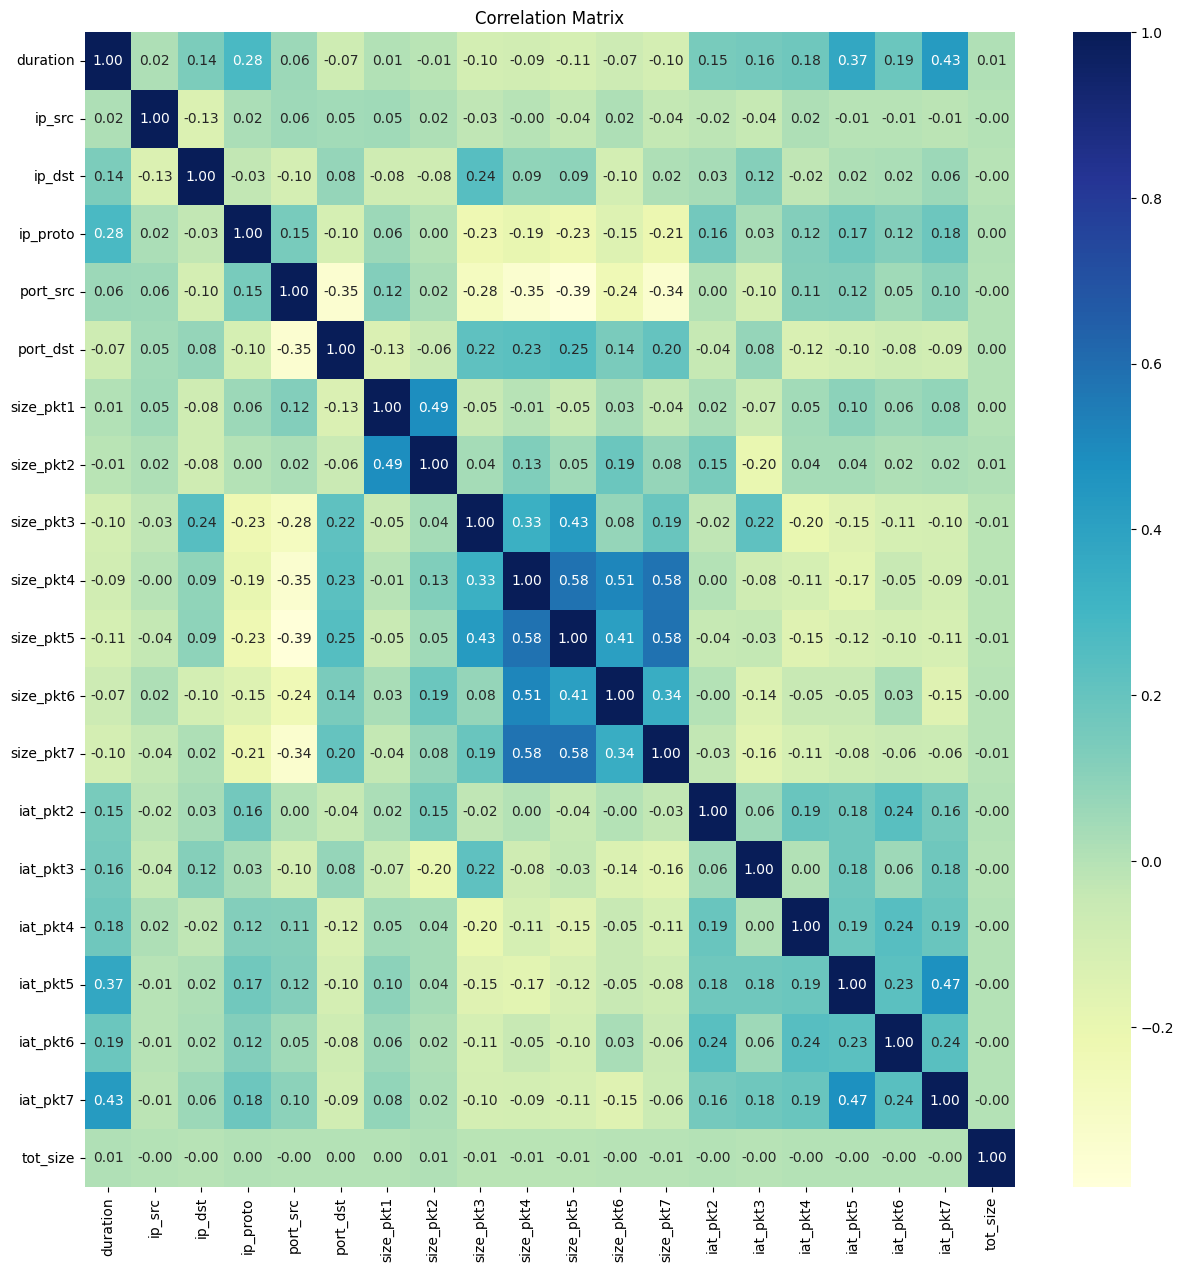

In [15]:
correlacion(df_v1)

## <FONT COLOR = 'orange'>**TRAINING**</FONT>

---

The time has come to create and train the model with the characteristics of the data set. As mentioned previously, the aim is to obtain a classification model with a silhouette score close to 1 and a Davies-Bouldin index close to 0. Finally, after obtaining the best parameters along with the model and classified flows, the label renaming to elephants and mice is performed.

In [16]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

def entrenamiento(df, features):
    seed = 42
    conjunto = df.copy()
    model = KMeans(n_clusters=2, max_iter=1000, random_state=seed)
    result = model.fit(conjunto[features])
    silhouette = silhouette_score(X=conjunto[features], labels=model.labels_, random_state=seed)
    davies_bouldin = davies_bouldin_score(conjunto[features], model.labels_)
    centroides = model.cluster_centers_
    conjunto['flow_type'] = model.labels_
    return conjunto, silhouette, davies_bouldin, centroides

In [17]:
features = df_v1.columns.tolist()

df_train = df_v1.copy()
[df_train, metrica_1, metrica_2, centroides] = entrenamiento(df_train, features)
display(df_train.groupby('flow_type').count())
print(f'\n\n Silhouette score: {metrica_1:.4f}\nDavies-Bouldin index: {metrica_2:.4f}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,duration,ip_src,ip_dst,ip_proto,port_src,port_dst,size_pkt1,size_pkt2,size_pkt3,size_pkt4,size_pkt5,size_pkt6,size_pkt7,iat_pkt2,iat_pkt3,iat_pkt4,iat_pkt5,iat_pkt6,iat_pkt7,tot_size
flow_type,,,,,,,,,,,,,,,,,,,,
0,47532,47532,47532,47532,47532,47532,47532,47532,47532,47532,47532,47532,47532,47532,47532,47532,47532,47532,47532,47532
1,25724,25724,25724,25724,25724,25724,25724,25724,25724,25724,25724,25724,25724,25724,25724,25724,25724,25724,25724,25724




 Silhouette score: 0.7557
Davies-Bouldin index: 0.3997


In [18]:
# CENTROIDS
df_centroides = pd.DataFrame(centroides, columns=df_v1.columns.tolist())

# IDENTIFICATION OF ELEPHANTS AND MICE
elephant = df_centroides['duration'].idxmax()
mice = df_centroides['duration'].idxmin()

print("CENTROIDS OF FLOW TYPES")
display(df_centroides)
print('\n\nIDENTIFICATION OF THE FLOW BY ITS DURATION')
print(f"The {elephant} cluster corresponds to elephant flows.")
print(f"The {mice} cluster corresponds to the mouse flows.")

CENTROIDS OF FLOW TYPES


,duration,ip_src,ip_dst,ip_proto,port_src,port_dst,size_pkt1,size_pkt2,size_pkt3,size_pkt4,size_pkt5,size_pkt6,size_pkt7,iat_pkt2,iat_pkt3,iat_pkt4,iat_pkt5,iat_pkt6,iat_pkt7,tot_size
0,8.176947e+06,9.710617e+09,8.556967e+09,6.35130,4702.74859,26884.907431,148.738997,268.952706,942.820142,920.832197,1059.090592,949.518114,1061.695468,110448.223407,315994.507910,78153.749158,61481.330935,56662.704283,57437.217454,219097.602079
1,1.745313e+07,3.689915e+09,8.359177e+10,6.07526,285.45269,34876.736783,82.622881,116.869460,1355.450358,1064.750777,1224.013178,792.805901,1107.868178,102480.074444,496706.987483,21710.854338,22748.721816,43435.927538,52967.502993,52880.870393




IDENTIFICATION OF THE FLOW BY ITS DURATION
The 1 cluster corresponds to elephant flows.
The 0 cluster corresponds to the mouse flows.


In [19]:
df_train['flow_type'] = df_train['flow_type'].replace({elephant: 'elephant', mice: 'mice'})
df_train.head()

,duration,ip_src,ip_dst,ip_proto,port_src,port_dst,size_pkt1,size_pkt2,size_pkt3,size_pkt4,size_pkt5,size_pkt6,size_pkt7,iat_pkt2,iat_pkt3,iat_pkt4,iat_pkt5,iat_pkt6,iat_pkt7,tot_size,flow_type
0,22215,411772655,2443160248,6,80,43521,66,64,275,1518,1518,1518,1518,616,6289,14258,22,20,58,10992,mice
1,5980023,411772615,164247105218,6,80,1506,1518,1518,1518,1518,1518,950,1518,1121030,21,998925,21,31021,50,27138,elephant
2,226319,4117798176,41177194186,6,80,1587,66,64,1518,1518,1518,1012,1518,8299,207090,121,125,1971,410,22521,mice
3,153911,411772655,2443160248,6,80,43584,66,64,1518,1518,1518,1518,1518,727,151600,21,19,744,20,14904,mice
4,418309,411772615,68157168224,6,80,62277,82,70,1518,1518,1518,1518,1518,43584,243392,21,34,43685,33,56918,elephant


## <FONT COLOR = 'orange'>**SAVE THE DATASET WITH THE LABELS**</FONT>
---
---

In [20]:
UNIV1_df = uni1_df_copy.copy()
UNIV1_df.insert(loc=21, column='flow_type', value=df_train['flow_type'])
UNIV1_df.to_csv('UNIV1.csv', index=False)
display(UNIV1_df.head())
display(UNIV1_df.info())

,start_time,end_time,ip_src,ip_dst,ip_proto,port_src,port_dst,size_pkt1,size_pkt2,size_pkt3,size_pkt4,size_pkt5,size_pkt6,size_pkt7,iat_pkt2,iat_pkt3,iat_pkt4,iat_pkt5,iat_pkt6,iat_pkt7,tot_size,flow_type
0,1261067166249838,1261067166272053,411772655,2443160248,6,80,43521,66,64,275,1518,1518,1518,1518,616,6289,14258,22,20,58,10992,mice
1,1261067165656630,1261067171636653,411772615,164247105218,6,80,1506,1518,1518,1518,1518,1518,950,1518,1121030,21,998925,21,31021,50,27138,elephant
2,1261067170895775,1261067171122094,4117798176,41177194186,6,80,1587,66,64,1518,1518,1518,1012,1518,8299,207090,121,125,1971,410,22521,mice
3,1261067173048827,1261067173202738,411772655,2443160248,6,80,43584,66,64,1518,1518,1518,1518,1518,727,151600,21,19,744,20,14904,mice
4,1261067172050638,1261067172468947,411772615,68157168224,6,80,62277,82,70,1518,1518,1518,1518,1518,43584,243392,21,34,43685,33,56918,elephant


<class 'pandas.core.frame.DataFrame'>
Index: 73256 entries, 0 to 73392
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   start_time  73256 non-null  int64 
 1   end_time    73256 non-null  int64 
 2   ip_src      73256 non-null  int64 
 3   ip_dst      73256 non-null  int64 
 4   ip_proto    73256 non-null  int64 
 5   port_src    73256 non-null  int64 
 6   port_dst    73256 non-null  int64 
 7   size_pkt1   73256 non-null  int64 
 8   size_pkt2   73256 non-null  int64 
 9   size_pkt3   73256 non-null  int64 
 10  size_pkt4   73256 non-null  int64 
 11  size_pkt5   73256 non-null  int64 
 12  size_pkt6   73256 non-null  int64 
 13  size_pkt7   73256 non-null  int64 
 14  iat_pkt2    73256 non-null  int64 
 15  iat_pkt3    73256 non-null  int64 
 16  iat_pkt4    73256 non-null  int64 
 17  iat_pkt5    73256 non-null  int64 
 18  iat_pkt6    73256 non-null  int64 
 19  iat_pkt7    73256 non-null  int64 
 20  tot_size   

None